In [1]:
pip install scikit-learn xgboost matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.3/150.0 MB 4.5 MB/s eta 0:00:34
   - -------------------------------------- 4.7/150.0 MB 7.7 MB/s eta 0:00:19
   - -------------------------------------- 7.1/150.0 MB 8.4 MB/s eta 0:00:18
   -- ------------------------------------- 9.2/150.0 MB 8.8 MB/s eta 0:00:17
   --- ------------------------------------ 11.3/150.0 MB 9.1 MB/s eta 0:00:16
   --- ------------------------------------ 13.6/150.0 MB 9.4 MB/s eta 0:00:15
   ---- ----------------------------------- 15.7/150.0 MB 9.5 MB/s eta 0:00:15
   ---- ----------------------------------- 18.1/150.0 MB 9.7 MB/s eta 0:00:14
   ----- ---------------------------------- 20.4/150.0 MB 9.9 MB/s eta 0:0

Обработка 50000 строк...
Время обучения: 0.78 секунд

Обработка 100000 строк...
Время обучения: 0.88 секунд

Обработка 250000 строк...
Время обучения: 1.67 секунд

Обработка 500000 строк...
Время обучения: 3.28 секунд

Обработка 750000 строк...
Время обучения: 4.92 секунд

Обработка 1000000 строк...
Время обучения: 6.49 секунд



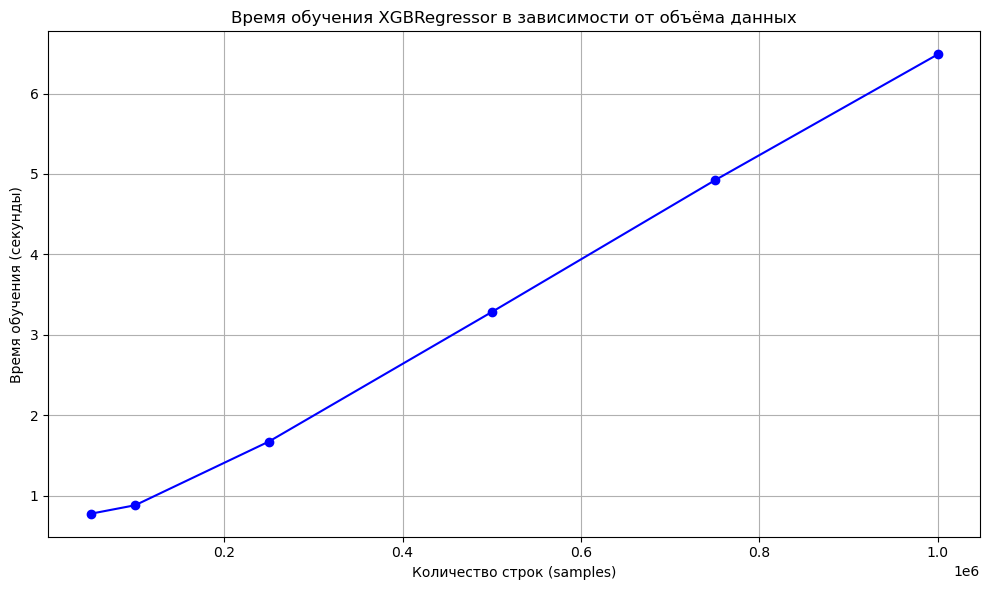

In [1]:

import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time

def measure_fit_time(n_samples_list, n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(n_jobs=-1, tree_method='hist', verbosity=0)

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append(duration)
        print(f"Время обучения: {duration:.2f} секунд\n")

    return times

# Объёмы данных для теста
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Замер времени
fit_times = measure_fit_time(samples)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(samples, fit_times, marker='o', color='blue')
plt.title('Время обучения XGBRegressor в зависимости от объёма данных')
plt.xlabel('Количество строк (samples)')
plt.ylabel('Время обучения (секунды)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.datasets import make_regression
from time import time

X, y = make_regression(n_samples=1_000_000, n_features=20, noise=0.1)
model = XGBRegressor(n_jobs=-1, tree_method="hist")  # Используем все потоки

start = time()
model.fit(X, y)
print("Time:", round(time() - start, 2), "seconds")


Time: 6.34 seconds


Обработка 50000 строк...
Время обучения: 0.64 секунд

Обработка 100000 строк...
Время обучения: 0.93 секунд

Обработка 250000 строк...
Время обучения: 1.67 секунд

Обработка 500000 строк...
Время обучения: 3.22 секунд

Обработка 750000 строк...
Время обучения: 4.77 секунд

Обработка 1000000 строк...
Время обучения: 6.36 секунд

✅ Результаты сохранены в xgboost_fit_benchmark.csv


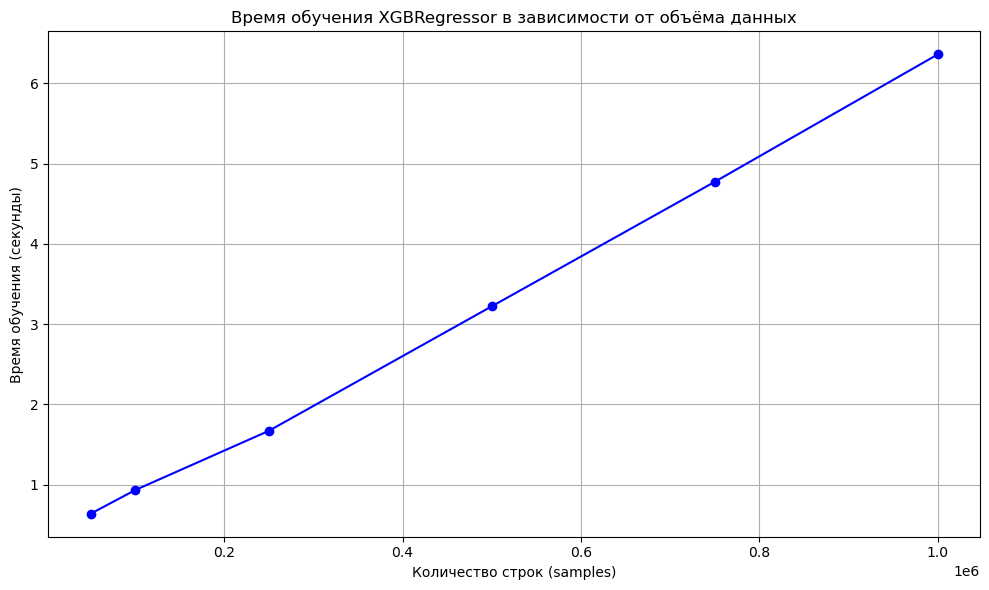

In [7]:
import numpy as np
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from time import time
import csv
from datetime import datetime
import platform

def measure_fit_time(n_samples_list, n_features=20):
    times = []

    for n in n_samples_list:
        print(f"Обработка {n} строк...")
        X, y = make_regression(n_samples=n, n_features=n_features, noise=0.1)

        model = XGBRegressor(n_jobs=-1, tree_method='hist', verbosity=0)

        start = time()
        model.fit(X, y)
        duration = time() - start
        times.append((n, duration))
        print(f"Время обучения: {duration:.2f} секунд\n")

    return times

def export_to_csv(results, filename="xgboost_fit_benchmark.csv"):
    cpu_name = platform.processor()
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([f"# Test started: {timestamp}, CPU: {cpu_name}"])
        writer.writerow(["n_samples", "fit_time_seconds"])
        for n, t in results:
            writer.writerow([n, round(t, 4)])
        writer.writerow([])

    print(f"✅ Результаты сохранены в {filename}")

def plot_results(results):
    samples = [x[0] for x in results]
    times = [x[1] for x in results]

    plt.figure(figsize=(10, 6))
    plt.plot(samples, times, marker='o', color='blue')
    plt.title('Время обучения XGBRegressor в зависимости от объёма данных')
    plt.xlabel('Количество строк (samples)')
    plt.ylabel('Время обучения (секунды)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Объёмы данных
samples = [50_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]

# Запуск замеров
fit_results = measure_fit_time(samples)

# Экспорт в CSV
export_to_csv(fit_results)

# Построение графика
plot_results(fit_results)
